# __Compte Rendu CC physique numérique__
### Antoine Molines 21305267

## __Introduction__
Le but de cet exercice est d'étudier la trajectoire d'un proton dans un cycltron. Plus précisement nous allons étudier sa vitessse en fonction de sa position dans les différentes partie du cyclotron un dispositif muni d'un champ électrique.
Nous allons représenter le modèle dy cyclotron par cette image:![](Figure3.png)

## __Partie 1:__

Premièrement, afin de calculer sa vitesse nous allons calculer les instants (sans unité) de sortie de la particule des régions D pour les 51 premiers évenements et les mettre dans un tableau numpy. La formule est donnée par : $t_n=n+\tau \sqrt{n}.$

In [13]:
import numpy as np   #on importe les modules utilisés:
import math

In [18]:
tau=0.5    #définition de constants

n=51       #nombre d'itération
instants=[]     #initialisation
for i in range(n):      #boulce et application e la formule     
    t=i+tau*np.sqrt(i)
    instants.append(t)   #ajout à la liste
tableau_t=np.array(instants)     #création du tableau
print(tableau_t)           #affichage
print("le tableau contient", len(instants), "éléments")  #vérification de la longueru

[ 0.          1.5         2.70710678  3.8660254   5.          6.11803399
  7.22474487  8.32287566  9.41421356 10.5        11.58113883 12.6583124
 13.73205081 14.80277564 15.87082869 16.93649167 18.         19.06155281
 20.12132034 21.17944947 22.23606798 23.29128785 24.34520788 25.39791576
 26.44948974 27.5        28.54950976 29.59807621 30.64575131 31.6925824
 32.73861279 33.78388218 34.82842712 35.87228132 36.91547595 37.95803989
 39.         40.04138127 41.082207   42.122499   43.16227766 44.20156212
 45.24037035 46.27871926 47.31662479 48.35410197 49.39116499 50.4278273
 51.46410162 52.5        53.53553391]
le tableau contient 51 éléments


Nous avons donc bien un tableau de 51 instants, nous vérifions la justesse des valeurs par celles données.

In [25]:
print(tableau_t[1]==1.5)   #vérificaiton des données par des opératuers booléens
print(tableau_t[4]==5)
print(tableau_t[9]==10.5)
print(tableau_t[16]==18)
print(tableau_t[25]==27.5)


True
True
True
True
True


Nous allons maintenant calculer les composantes x et y de la vitesse quand le proton est présent dans les deux régions 2, cela correspond à un intervalle de temps de la forme $t_{n+1}-1$ à $t_{n+1}$. Ces vitesses se calculent par les formules :$$v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$\
Nous allons calculer deux fois ces composantes, une fois pour l'intervalle:$t_2-1$ a $t_2$, et une fois pour $t_4-1$ a $t_4$
:

In [57]:
T1=np.linspace(tableau_t[2]-1, tableau_t[2], 50)        #nous commencons par créer les tableaux correspondants aux intervalles, avec 50 valeurs
T2=np.linspace(tableau_t[4]-1, tableau_t[4], 50)


In [89]:
# ici nous calculons les compposantes pour le premier intervalle de temps
vx1=[]               #iniitalisatoin
for i in range (n-1):            #boucle sur n-1, car on va jusqu'à n+1
    v=((-1)**i)*(np.sqrt(i+1))*(np.sin(math.pi*(T1[i]-instants[i+1])))         #calcule de la vitesse
    vx1.append(v)       #ajout
vx1_tab=np.array(vx1)     #création d'un tableau

 
#idem pour y    
vy1=[]
for i in range (n-1):
    v=(-(-1)**i)*(np.sqrt(i+1))*(np.cos(math.pi*(T1[i]-instants[i+1])))
    vy1.append(v)
vy1_tab=np.array(vy1)



In [88]:
#idem
vx2=[]
for i in range (n-1):
    v=((-1)**i)*(np.sqrt(i+1))*(np.sin(math.pi*(T2[i]-instants[i+1])))
    vx2.append(v)
vx2_tab=np.array(vx2)



vy2=[]
for i in range (n-1):
    v=(-(-1)**i)*(np.sqrt(i+1))*(np.cos(math.pi*(T2[i]-instants[i+1])))
    vy2.append(v)
v21_tab=np.array(vy2)

Nous allons maintenant afficher ces vitesses en fonction des deux intervalles de temps, nous allons donc importer le module matplotlib.

In [90]:
import matplotlib.pyplot as plt

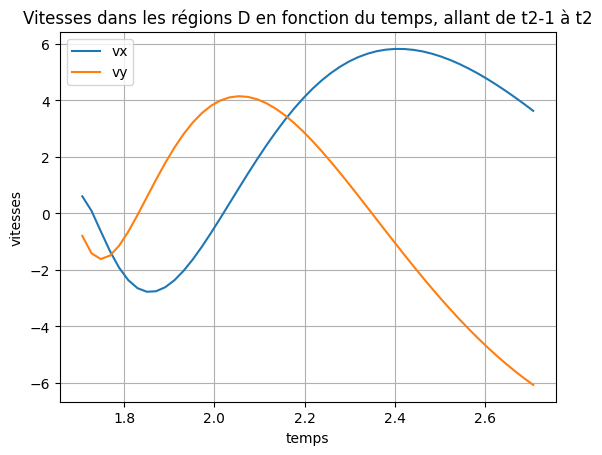

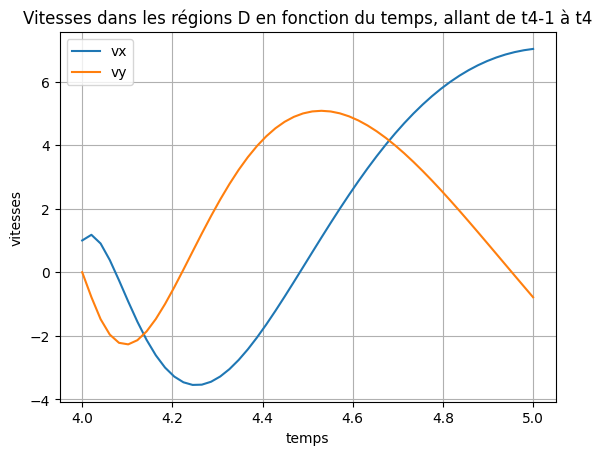

In [91]:
plt.figure()

plt.plot(T1, vx1, label="vx")        #créatuib des courbes
plt.plot(T1,vy1, label="vy")
plt.grid()        #grille
plt.xlabel("temps")              #titres, légendes, axes
plt.ylabel("vitesses")
plt.legend()
plt.title("Vitesses dans les régions D en fonction du temps, allant de t2-1 à t2")
plt.show()      #affichage


#idem
plt.figure
plt.plot(T2, vx2, label="vx")
plt.plot(T2,vy2, label="vy")
plt.grid()
plt.xlabel("temps")
plt.ylabel("vitesses")
plt.legend()
plt.title("Vitesses dans les régions D en fonction du temps, allant de t4-1 à t4")
plt.show()

Nous observons des courbes oscillantes, déphasées et d'amplitude légerement différentes. Nous observons que l'amplitude des oscillations augmente avec le temps. La vitesse est sans unité car le temps l'est aussi.

In [139]:
#maximum et temps associé pour le premier intervalle.
print("le maximum de la vitesse x pour le premier intervalle de temps est: ",max(vx1))
print("le temps associé à ce max est:", T1[34])
print("le maximum de la vitesse y pour le premier intervalle de temps est: ",max(vy1))
print("le temps associé à ce max est:", T1[17])

le maximum de la vitesse x pour le premier intervalle de temps est:  5.821295438405685
le temps associé à ce max est: 2.4009843322069555
le maximum de la vitesse y pour le premier intervalle de temps est:  4.148236024849794
le temps associé à ce max est: 2.0540455566967517


In [135]:
#maximum et temps associé pour le deuxième intervalle.
print("le maximum de la vitesse x pour le deuxième intervalle de temps est: ",max(vx2))
print("le temps associé à ce max est:", T2[49])
print("le maximum de la vitesse y pour le deuxième intervalle de temps est: ",max(vy2))
print("le temps associé à ce max est:", T2[26])

le maximum de la vitesse x pour le deuxième intervalle de temps est:  7.027053938553633
le temps associé à ce max est: 5.0
le maximum de la vitesse y pour le deuxième intervalle de temps est:  5.079882055906305
le temps associé à ce max est: 4.530612244897959


Nous voyons que dans les deux cas, le maximum de la composante de la vitesse en y arrive avant celle en x, et est moins grande. Cela est due à ce que la trajectoire du proton dans les régions D n'est pas exactement un demi-cercle, car la région entre les deux D n'est pas une ligne. Ainsi, le proton parcours plus de distance en x et est donc plus accéléré par le champs éléctrique, et sa vitesse est plus grande.

## __Partie 2:__

Nous allons maintenant calculer les composantes des vitesses x et y quand le proton se touve dans la région entre les D, et allons tracer les composantes des vitesses du proton pour un temps qui se suit, pour que nous puissons voir l'évolution de la vitesse quand le proton change de région. Nous allons faire cette étude sur un intervalle de temps de $t_0$ à $t_6$.\
Nous allons donc utiliser les formules pour la vitesse entre les deux régions:$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$

In [193]:
new_instants=instants[0:7]                   #création des listes et tableaux pour le nouvel intervalle de temps.
new_instants_tab=np.array(new_instants)
new_n=7                                      #nouveau nombre d'itération
new_t=np.linspace(new_instants[6],new_instants[0],7 )

 
vx_horsD=np.zeros(7)       #tableau nulle pour vx
vy_horsD=[]             #initilisatoin 
for i in range (new_n):        #comme avant, mais avec nouvelle formule
    vy=((-1)**i)*(np.sqrt(i)+(new_t[i]-new_instants[i])/tau)
    vy_horsD.append(vy)


#comme avant mais avec nouvelles itréation.
vxD=[]
for i in range (new_n-1):
    v=((-1)**i)*(np.sqrt(i+1))*(np.sin(math.pi*(new_t[i]-new_instants[i+1])))
    vxD.append(v)

vyD=[]
for i in range (new_n-1):
    v=(-(-1)**i)*(np.sqrt(i+1))*(np.cos(math.pi*(new_t[i]-new_instants[i+1])))
    vyD.append(v)



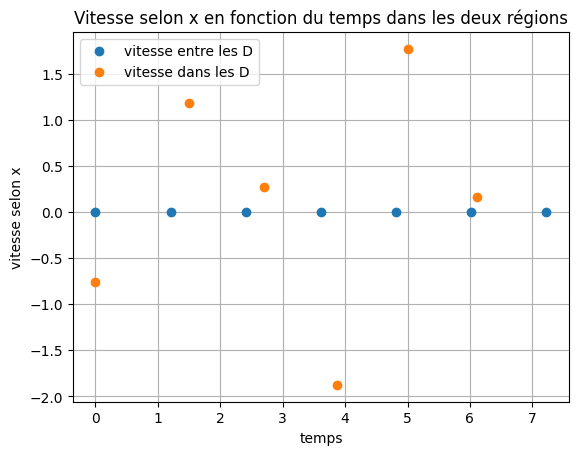

In [211]:
plt.plot(new_t, vx_horsD, "o", label="vitesse entre les D")
plt.plot(new_instants[0:6], vxD,"o", label="vitesse dans les D")        #problèmes d'indices...
plt.title("Vitesse selon x en fonction du temps dans les deux régions")
plt.xlabel("temps")
plt.ylabel("vitesse selon x")
plt.grid()
plt.legend()
plt.show()

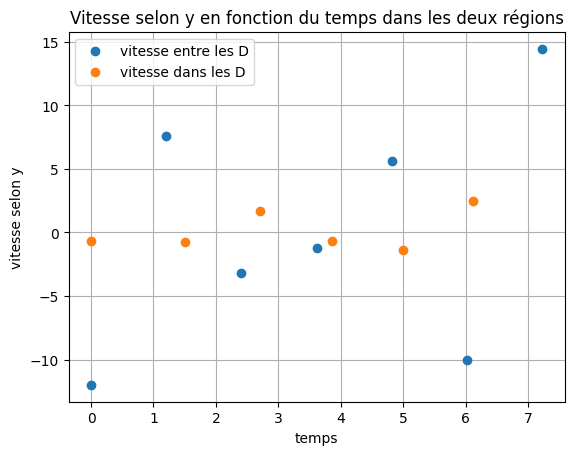

In [210]:
plt.plot(new_t, vy_horsD,"o", label="vitesse entre les D")
plt.plot(new_instants[0:6], vyD,"o", label="vitesse dans les D")
plt.title("Vitesse selon y en fonction du temps dans les deux régions")
plt.xlabel("temps")
plt.ylabel("vitesse selon y")
plt.grid()
plt.legend()
plt.show()

Ici, nous n'avons pas assez de points pour tracer la courbe, mais nous voyons que si l'on en avait plus, la courbe des deux composantes des vitesses serait continue. Nous observons par exemple, que pour la composante x, la vitesse alterne entre négative, nulle et poistive, ce qui est cohérent avec la trajectoire: vitesse négative=région D inférieur; vitesse nulle=région entre D, vitesse positive=région D supérieur. Pour la vitesse selon y, nous observons également que la vitesse est beaucoup plus grande quand le proton quitte la région entre les D, ce qui cohérent avec sa trajectoire. Dans les 2 cas, nous observons des oscillations attendues.

## __Conclusion__
Pour conclure, dans cet exercice nous avons étudier la trajectoire d'un proton dans le modèle du mouuvement cyclotron généré par un champ électrique. En utilisant des méthodes numériques pour étudier les vitesses de ce proton, nous avons découvert que le cyclotron augmente le module de la vitesse au cours du temps: __le cyclotron sert donc à accélerer des particules chargées.__